In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jul 29 18:25:45 2019

@author: Vignesh
"""

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import math
start_timestamp = 495.68 #15:12:46
data = pd.read_csv('Cleandata_master.csv')
x_axis = data.x*9.8
y_axis = data.y*9.8
z_axis = data.z*9.8
#xi = [i for i in range(0, len(x))]

t = [i for i in range (0,len(data.Index))]

mag = np.sqrt(np.square(x_axis)+np.square(y_axis)+np.square(z_axis))
window = 2000
rolling_mean_x = x_axis.rolling(window).mean()
rolling_mean_y = y_axis.rolling(window).mean()
rolling_mean_z = z_axis.rolling(window).mean()

rolling_stdev_x = x_axis.rolling(window).std()
rolling_stdev_y = y_axis.rolling(window).std()
rolling_stdev_z = z_axis.rolling(window).std()

rolling_var_x = x_axis.rolling(window).var()
rolling_var_y = y_axis.rolling(window).var()
rolling_var_z = z_axis.rolling(window).var()

xtilt= np.arctan(rolling_mean_x/(np.sqrt(np.square(rolling_mean_y)+np.square(rolling_mean_z))))
xtilt = np.degrees(xtilt)
ytilt= np.arctan(rolling_mean_y/(np.sqrt(np.square(rolling_mean_x)+np.square(rolling_mean_z))))
ytilt = np.degrees(ytilt)
rolling_mean_mag = mag.rolling(window=1500).mean()
#plt.plot(x_axis,color='yellow')
#plt.plot(y_axis,color='pink')
#plt.plot(z_axis,color='grey')
#plt.ylim(-20,20)
plt.plot(t,rolling_mean_x,color = 'red')
plt.plot(rolling_mean_y,color = 'blue')
plt.plot(rolling_mean_z,color = 'green')

#plt.plot(rolling_stdev_x,color = 'orange')
#plt.plot(rolling_stdev_y,color = 'pink')
#plt.plot(rolling_stdev_z,color = 'purple')

#plt.plot(rolling_var_x,color = 'orange')
#plt.plot(rolling_var_y,color = 'pink')
#plt.plot(rolling_var_z,color = 'purple')
#plt.plot(rolling_mean_mag,color = 'black')
# plt.plot(xtilt,color = 'orange')
# plt.plot(ytilt,color = 'cyan')
plt.xlabel('time')
plt.ylabel('Acceleration in m/s2')
plt.show()

# print(rolling_mean_x,rolling_mean_y,rolling_mean_z)
data = pd.concat([rolling_mean_x,rolling_mean_y,rolling_mean_z],axis=1)
data

<Figure size 640x480 with 1 Axes>

,x,y,z
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [2]:
data = data.dropna()
data.head()

,x,y,z
1999,1.662037,-7.048510,-0.817582
2000,1.662338,-7.048574,-0.817462
2001,1.664326,-7.039704,-0.814981
2002,1.664323,-7.039745,-0.814873
2003,1.661645,-7.046402,-0.805002


In [3]:
features = data.iloc[:,:]
features.shape

(183078, 3)

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(features)
y_kmeans = kmeans.predict(features)

In [5]:
print(y_kmeans)

[1 1 1 ... 1 1 1]


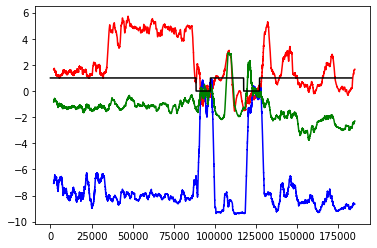

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(t,rolling_mean_x,color = 'red')
plt.plot(rolling_mean_y,color = 'blue')
plt.plot(rolling_mean_z,color = 'green')
plt.plot(y_kmeans,color='black')
plt.show()



In [7]:
# Saving model to disk
import pickle
pickle.dump(kmeans, open('Kmeansmodel.pkl','wb'))